In [1]:
!nvidia-smi

Tue May  3 08:33:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Downloading Data
German, Persian and Combined

In [2]:
#Upload the kaggle json generated from kaggle site
%%capture
!pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [3]:
#German Dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/


100% 609M/612M [00:02<00:00, 230MB/s]
100% 612M/612M [00:02<00:00, 222MB/s]


In [4]:
!mkdir German


In [5]:
%%capture
!unzip gtsrb-german-traffic-sign -d German

In [26]:
#Persian Dataset
!kaggle datasets download -d saraparsaseresht/persian-traffic-sign-dataset-ptsd

 97% 529M/544M [00:02<00:00, 214MB/s]
100% 544M/544M [00:02<00:00, 203MB/s]


In [27]:
!mkdir Persian

In [28]:
%%capture
!unzip persian-traffic-sign-dataset-ptsd -d Persian

In [29]:
# Data combining for German und Persian 
import shutil
import os
#!mkdir Combined

ger_map = [1, 2, 3, 4, 5, 10, 13, 14, 17, 18, 22, 25, 27, 28, 29, 33, 34, 35, 38, 39, 40]
for fol in range(len(ger_map)):
  source_dir = f'/content/German/Train/{ger_map[fol]}'
  destination_dir = f'/content/Combined/{fol}'
  shutil.copytree(source_dir, destination_dir)

In [30]:
german_cominedlength = len(os.listdir('/content/Combined/1'))
print("Length of data before merging ",german_cominedlength)

Length of data before merging  2250


In [31]:
import os
# new_values =  {
#     1 :'10_Maximum Speed 30',
#     2:'12_Maximum Speed 50',
#     3:'13_Maximum Speed 60',
#     4:'14_Maximum Speed 70',
#     5:'15_Maximum Speed 80',
#     10:'38_Truck Prohibited',
#     13:'5_Give Way',
#     14:'37_STOP',
#     17:'18_No Entry',
#     18:'4_Danger',
#     22:'6_Hump',
#     25:'30_Road Work',
#     27:'26_Pedestrian crossing',
#     28:'33_School Crossing',
#     29:'3_Cycle crossing',
#     33:'27_Right Bend',
#     34:'7_Left Bend',
#     35:'22_One way Traffic',
#     38:'2_Compulsory Keep Right',
#     39:'1_Compulsory Keep Left',
#     40:'31_Roundabouts' 
#     }


# for key,value in new_values.items():
#   source_dir = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{value}';
#   for files in os.listdir(source_dir):
#     source = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{value}/{files}';
#     destination_dir =  f'/content/Combined/{key}';
#     shutil.copy(source,destination_dir);

per_map = ['10_Maximum Speed 30', '12_Maximum Speed 50', '13_Maximum Speed 60', '14_Maximum Speed 70', '15_Maximum Speed 80', '38_Truck Prohibited', '5_Give Way', '37_STOP', '18_No Entry', '4_Danger', '6_Hump', '30_Road Work', '26_Pedestrian crossing', '33_School Crossing', '3_Cycle crossing', '27_Right Bend', '7_Left Bend', '22_One way Traffic', '2_Compulsory Keep Right', '1_Compulsory Keep Left', '31_Roundabouts']

for fol in range(len(per_map)):
  source_dir = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}';
  for files in os.listdir(source_dir):
    source = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/train/{per_map[fol]}/{files}';
    destination_dir =  f'/content/Combined/{fol}';
    shutil.copy(source,destination_dir);
    

In [32]:
german_cominedlength = len(os.listdir('/content/Combined/1'))
print("Length of data after merging ",german_cominedlength)

Length of data after merging  2500


# Generating CSV ; Persian and Combined

In [33]:
#For generating the persian csv with class id 
def generate_PersianCSV():
  #Only for Persian Dataset
  df = pd.read_csv('/content/Persian/testset_CSV.csv',sep='\t')
  df = df["file,species"].str.split(',', 1,expand = True)
  df.columns=['path','class']
  #As you see only class names are mentioned in the csv, and we need classId ?
  #Keys for Persian Dataset:

  check_dict = {            
              0:'Compulsory Keep BothSide',
              1:'Compulsory Keep Left', 
              2:'Compulsory Keep Right', 
              3:'Cycle crossing', 
              4:'Danger', 
              5:'Give Way', 
              6:'Hump', 
              7:'Left Bend', 
              8:'Left Margin', 
              9:'Left Turn Prohibited', 
              10:'Maximum Speed 30', 
              11:'Maximum Speed 40', 
              12:'Maximum Speed 50', 
              13:'Maximum Speed 60', 
              14:'Maximum Speed 70', 
              15:'Maximum Speed 80', 
              16:'Maximum Speed 90', 
              17:'MotorCycle Prohibited', 
              18:'No Entry', 
              19:'No Horn', 
              20:'NO Stopping', 
              21:'NO Waiting', 
              22:'One way Traffic', 
              23:'Park', 
              24:'Park Forbidden', 
              25:'Pedestrain', 
              26:'Pedestrian crossing', 
              27:'Right Bend', 
              28:'Right Margin', 
              29:'Right Turn Prohibited', 
              30:'Road Work',
              31:'Roundabouts', 
              32:'School', 
              33:'School Crossing', 
              34:'Side Road Right', 
              35:'Slow', 
              36:'Speed Camera', 
              37:'STOP', 
              38:'Truck Prohibited', 
              39:'Two Way Traffic', 
              40:'U-Turn', 
              41:'U-Turn Allowed', 
              42:'U-turn Prohibited'
              }

  for idx,val in enumerate(df['class']):
    for key,dictval in check_dict.items():
      if dictval == val:
        df.loc[idx,'classid'] = key;

  for idx,val in enumerate(df['path']):
    df.loc[idx,'path'] = f'/content/Persian/PTSD_Recognition/PTSD_Recognition/test/PTSD_{val}'

  df = df.dropna()# Removing classId with NAN
  len(df.classid.unique())
  df.to_csv(r'PersianTest.csv', index = False)
  print(df.columns)
  display(df)
  return df
  

# Data Preprocessing
Change DataSetPath for German or Persian


In [34]:
#Preprocessing Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator;
#Model imports
from tensorflow.keras.applications import ResNet50,VGG19
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential;
import pandas as pd;
import numpy as np;
from tqdm import tqdm

In [36]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=False,validation_split=0.2);
valid_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2);
test_gen = ImageDataGenerator(rescale=1./255);
training_dataset = 'COMBINED' # Use GERMAN OR PERSIAN OR COMBINED

if training_dataset == 'GERMAN':
  print('You are testing with German Dataset')
  train_path ='/content/German/Train';
  test_path= '/content/German/Test';
  test_df = pd.read_csv('/content/German/Test.csv');
  for idx,val in enumerate(test_df['Path']):
    #/content/German/Test/00000.png
    test_df.loc[idx,'Path'] = f'/content/German/{val}'
elif training_dataset == 'PERSIAN':
  print('You are testing with Persian Dataset')
  train_path ='/content/Persian/PTSD_Recognition/PTSD_Recognition/train';
  test_path = '/content/Persian/PTSD_Recognition/PTSD_Recognition/test'
  test_df = generate_PersianCSV();
else:
  print('You are testing with Combined Dataset')
  train_path ='/content/Combined';
  #test also needs to be generated ;
  #test_path = '/content/Persian/PTSD_Recognition/PTSD_Recognition/test';
  #test_df needs to be generated after combination;

#Processing 981 images at a time for training -> Batch size = 31368/ 981 => 32
BATCH_SIZE = 32;
train_ds = train_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             subset='training',
                                             class_mode='categorical');
valid_ds = valid_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
                                             subset='validation',
                                             class_mode='categorical',
                                             shuffle=False);
#http://blog.wafrat.com/survey-of-keras-image-related-generators/
NUM_CLASS = train_ds.num_classes
print(NUM_CLASS)
#Since test datframe is not genearted
if training_dataset  != 'COMBINED':
  test_df.columns= test_df.columns.str.strip().str.lower()
  test_df['classid']=test_df['classid'].astype(str)
  test_gen=test_gen.flow_from_dataframe( test_df, x_col='path', y_col='classid', target_size=(224,224), class_mode='categorical',
                                     color_mode='rgb', shuffle=False, batch_size=8)


You are testing with Combined Dataset
Found 25986 images belonging to 21 classes.
Found 6483 images belonging to 21 classes.
21


In [ ]:
'''
steps = valid_ds.n / batch_size
print(steps) 
batch_size = 32
x , y = [] , []
for i in range(steps):
    a , b = valid_ds.next()
    x.extend(a) 
    y.extend(b)
ar_A = np.array(x);
ar_B = np.array(y);   
'''

In [ ]:
# Generating X and Y from the generators for Evaluation Metrics:
# Choose the dataset which has shorter iterations ;

In [37]:

batch_size = BATCH_SIZE
valid_ds.reset()
X_valid, Y_valid = next(valid_ds)
for i in tqdm(range(int(valid_ds.n/batch_size)-1)): 
  img, label = next(valid_ds)
  X_valid = np.append(X_valid, img, axis=0 )
  Y_valid = np.append(Y_valid, label, axis=0)


100%|██████████| 201/201 [04:00<00:00,  1.20s/it]


In [38]:
print(X_valid.shape, Y_valid.shape)

(6464, 224, 224, 3) (6464, 21)


In [39]:
train_classList = list(train_ds.class_indices.keys());
valid_classList = list(valid_ds.class_indices.keys());
print(train_classList);
print(len(train_classList));

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']
21


# VGG 19Model Transfer Training


In [ ]:
#Reference Paper: https://arxiv.org/pdf/1409.1556v6.pdf
from tensorflow.keras.models import Model;
from tensorflow.keras.initializers import HeNormal;
import tensorflow as tf; 
base_model = VGG19(include_top = False,weights='imagenet',input_shape=(224,224,3));
x = base_model.output;
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x);
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x);
x = Dense(128,activation='relu',kernel_initializer=HeNormal())(x);
x = BatchNormalization()(x);
predictions = Dense(NUM_CLASS,activation='softmax')(x);
model = Model(inputs=base_model.inputs,outputs=predictions);

model.summary();
print(f'Total number of layers : {len(model.layers)}')


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
#Freezing Layers:
'''
for layer in model.layers[:18]:
   layer.trainable = False
for layer in model.layers[18:]:
   layer.trainable = True
'''
for layer in base_model.layers:
    layer.trainable = False
    

In [ ]:
import math
import tensorflow as tf;
# We take the ceiling because we do not drop the remainder of the batch
TRAINING_SIZE = len(train_ds);
VALIDATION_SIZE = len(valid_ds);

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

train_steps = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE);
print(f'training_stpes is {train_steps} and validation steps is {val_steps} ');


training_stpes is 12 and validation steps is 3 


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam;
from tensorflow.keras.callbacks import EarlyStopping;
model.compile(loss="categorical_crossentropy",optimizer='Adam',metrics=['accuracy']);
es = EarlyStopping(monitor='val_accuracy',patience=50,restore_best_weights=True)
model.fit(train_ds,
          steps_per_epoch=train_steps,
          epochs=10,
          verbose=1,
          validation_data=valid_ds,
          validation_steps=val_steps,
          callbacks=[es])


Epoch 1/10
12/12 [==============================] - 34s 1s/step - loss: 4.0181 - accuracy: 0.0599 - val_loss: 4.5331 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 5s 431ms/step - loss: 3.4823 - accuracy: 0.1354 - val_loss: 4.2971 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 5s 432ms/step - loss: 3.0863 - accuracy: 0.2734 - val_loss: 4.0806 - val_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 5s 431ms/step - loss: 2.7791 - accuracy: 0.3255 - val_loss: 3.9311 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 5s 432ms/step - loss: 2.5378 - accuracy: 0.3698 - val_loss: 3.8324 - val_accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 5s 431ms/step - loss: 2.3798 - accuracy: 0.4427 - val_loss: 3.7257 - val_accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 5s 430ms/step - loss: 2.5011 - accuracy: 0.3958 - val_loss: 3.6923 - val_a

In [ ]:
evaluation = model.evaluate(test_gen)
print(evaluation)

1579/1579 [==============================] - 240s 150ms/step - loss: 1.8505 - accuracy: 0.4970
[1.8505443334579468, 0.49699127674102783]


# ResNet50 Model Training


In [40]:
# Overfitting -> tried with Dropout,batch normalization, L1 L2 

from tensorflow.keras.models import Model;
#Resnet_Model:https://arxiv.org/pdf/1512.03385.pdf
from tensorflow.keras.initializers import HeNormal;
from tensorflow.keras import regularizers
base_model = ResNet50(include_top = False,weights='imagenet',input_shape=(224,224,3));
x = base_model.output;
x = GlobalAveragePooling2D()(x);
x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
x = Dense(64,activation='relu',
          kernel_initializer=HeNormal(),
          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x);
x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
x = Dense(64,activation='relu',
          kernel_initializer=HeNormal(),
          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
          )(x);
x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
x = Dense(64,activation='relu',
          kernel_initializer=HeNormal(),
          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x);
x = BatchNormalization()(x)
#x=  Dropout(0.2)(x)
#x = Dense(124,activation='relu',kernel_initializer=HeNormal())(x);
predictions = Dense(NUM_CLASS,activation='softmax')(x);
resnet_model = Model(inputs=base_model.inputs,outputs=predictions);
resnet_model.summary();
print(len(resnet_model.layers))




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [41]:
# Can be unfreezed in higher layers 
for layer in base_model.layers:
   layer.trainable = False


In [42]:
import math

# We take the ceiling because we do not drop the remainder of the batch
TRAINING_SIZE = len(train_ds);
VALIDATION_SIZE = len(valid_ds);

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

train_steps = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE);
print(f'training_stpes is {train_steps} and validation steps is {val_steps} ');

training_stpes is 26 and validation steps is 7 


In [44]:
from tensorflow.keras.optimizers import SGD,Adam;
from tensorflow.keras.callbacks import EarlyStopping;
#https://stackoverflow.com/questions/38340311/what-is-the-difference-between-steps-and-epochs-in-tensorflow
resnet_model.compile(loss="categorical_crossentropy",optimizer=Adam(beta_1=0.9,beta_2=0.999),metrics=['accuracy']);
es = EarlyStopping(monitor="val_accuracy",patience=50,restore_best_weights=True)
resnet_model.fit(train_ds,
         steps_per_epoch=train_steps,
          epochs=50,
          verbose=1,
          validation_data=valid_ds,
          validation_steps=val_steps,
          callbacks=[es])
         


Epoch 1/50
26/26 [==============================] - 18s 357ms/step - loss: 3.0661 - accuracy: 0.1550 - val_loss: 2.1455 - val_accuracy: 0.6696
Epoch 2/50
26/26 [==============================] - 7s 285ms/step - loss: 2.6289 - accuracy: 0.2572 - val_loss: 2.0676 - val_accuracy: 0.9955
Epoch 3/50
26/26 [==============================] - 7s 281ms/step - loss: 2.4761 - accuracy: 0.3065 - val_loss: 2.0963 - val_accuracy: 0.9643
Epoch 4/50
26/26 [==============================] - 7s 282ms/step - loss: 2.2398 - accuracy: 0.3534 - val_loss: 2.2326 - val_accuracy: 0.7545
Epoch 5/50
26/26 [==============================] - 7s 279ms/step - loss: 2.1455 - accuracy: 0.3954 - val_loss: 2.0887 - val_accuracy: 0.8571
Epoch 6/50
26/26 [==============================] - 7s 281ms/step - loss: 1.9640 - accuracy: 0.4267 - val_loss: 2.2882 - val_accuracy: 0.5357
Epoch 7/50
26/26 [==============================] - 7s 281ms/step - loss: 1.9256 - accuracy: 0.4363 - val_loss: 2.4496 - val_accuracy: 0.2991
Epoch

# Model Metrics 

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Confusion Matrix :
preds=resnet_model.predict(X_valid);
print(preds.shape)
print(Y_valid.shape)

(6464, 21)
(6464, 21)


In [46]:
y_pred = np.argmax(preds,axis=1)
print(y_pred.shape)
y_truth = np.argmax(Y_valid,axis=1);
print(y_truth.shape)
print(Y_valid.shape)

(6464,)
(6464,)
(6464, 21)


In [ ]:
'''
#Confution Matrix and Classification Report
valid_ds.reset()
Y_pred = resnet_model.predict_generator(valid_ds)#, 2388 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred.shape)
print('Confusion Matrix')
#print(confusion_matrix(valid_ds.classes, y_pred))
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


(2863,)
Confusion Matrix


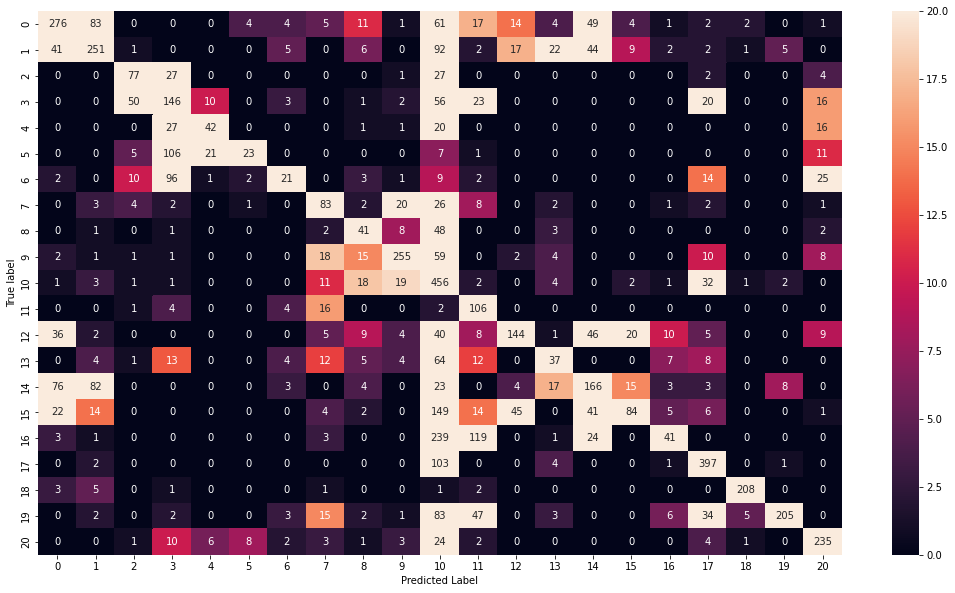

In [47]:
import seaborn as sns
conf = confusion_matrix(y_truth, y_pred)
plt.figure(figsize=(18,10))
ax = sns.heatmap(conf, annot=True, fmt="d", vmax=20)
ax.set(xlabel='Predicted Label',
       ylabel='True label');

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_truth, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.51      0.55       539
           1       0.55      0.50      0.53       500
           2       0.51      0.56      0.53       138
           3       0.33      0.45      0.38       327
           4       0.53      0.39      0.45       107
           5       0.61      0.13      0.22       174
           6       0.43      0.11      0.18       186
           7       0.47      0.54      0.50       155
           8       0.34      0.39      0.36       106
           9       0.80      0.68      0.73       376
          10       0.29      0.82      0.43       554
          11       0.29      0.80      0.43       133
          12       0.64      0.42      0.51       339
          13       0.36      0.22      0.27       171
          14       0.45      0.41      0.43       404
          15       0.63      0.22      0.32       387
          16       0.53      0.10      0.16       431
          17       0.73    

#Visualize Feature Maps:
Still in progress 
Trying to visualize the feature maps and the filters applied 


In [ ]:
#https://www.youtube.com/watch?v=ho6JXE3EbZ8&ab_channel=DigitalSreeni
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot


for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
       
    print(i , layer.name , layer.output.shape)
model = Model(inputs=model.inputs , outputs=model.layers[1].output)
image = load_img("/content/Train/0/00000_00000_00012.png" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

1 conv1_pad (None, 230, 230, 3)


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

image = preprocess_input(image)

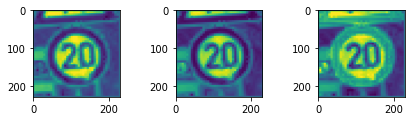

In [ ]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1])
    
pyplot.show()

In [ ]:
layers = model.layers
conv2d_layersidx = []
for i in range(len(model.layers)):
  layer = model.layers[i]
  if '_conv'  in layer.name:
        conv2d_layersidx.append(i)

print(conv2d_layersidx)
#print(model.layers[2].name)

[1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]


In [ ]:
filters,biases = model.layers[1].get_weights()

In [ ]:
print(filters.shape,layers[1].name)

(3, 3, 3, 64) block1_conv1


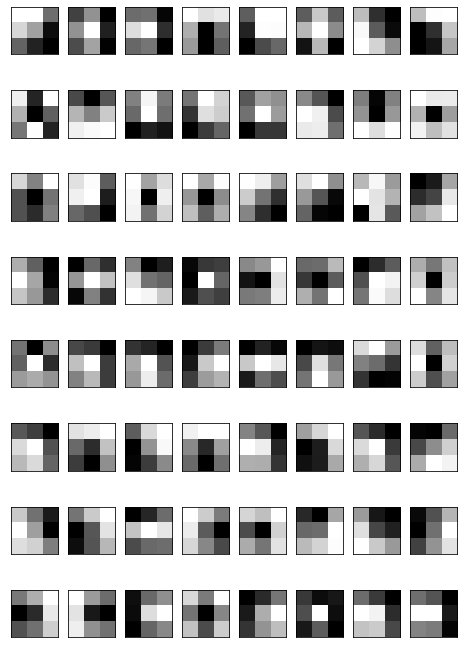

In [ ]:
from matplotlib import pyplot as plt   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()   

In [ ]:
layers = model.layers
conv2d_layersidx = []
for i in range(len(model.layers)):
  layer = model.layers[i]
  if '_conv'  in layer.name:
        conv2d_layersidx.append(i)

print(conv2d_layersidx)

[1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]


In [ ]:

#Define a new truncated model to only include the conv layers of interest
conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
#conv_layer_index = [1,3]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv2d_layersidx]
print(outputs)
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

[<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>, <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>, <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>, <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>, <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv2')>, <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv3')>, <Ke

16


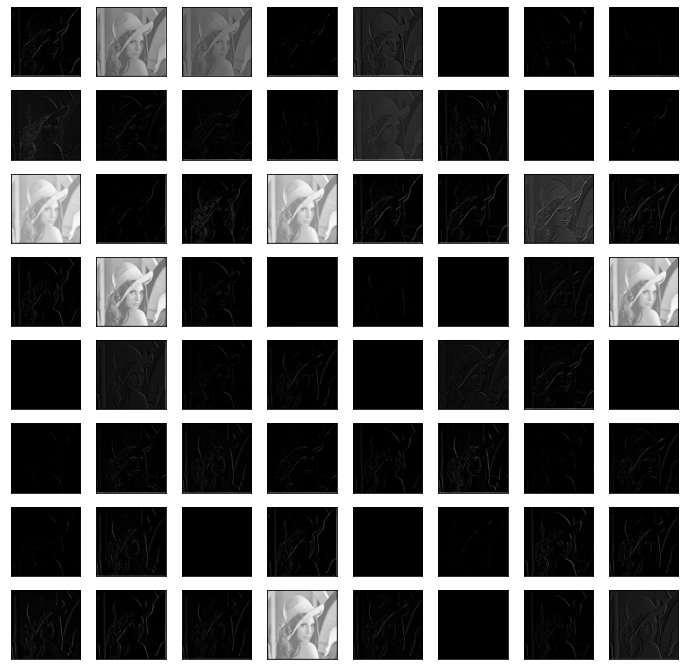

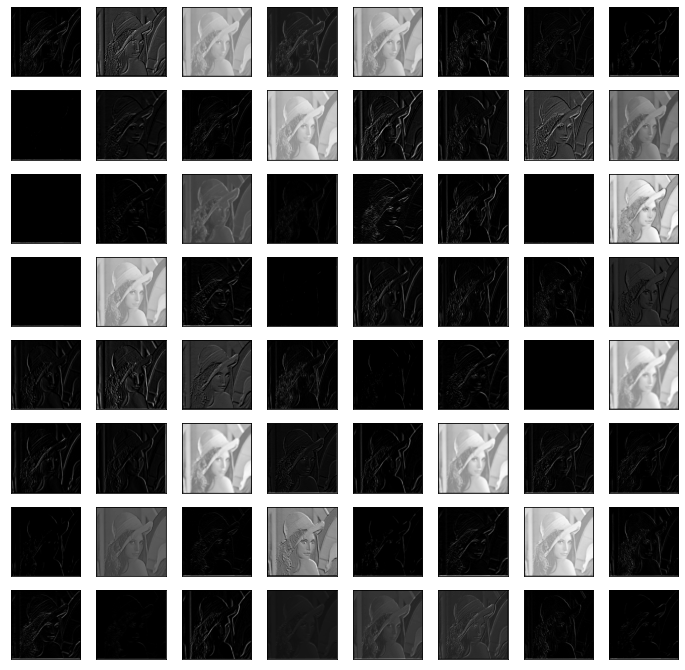

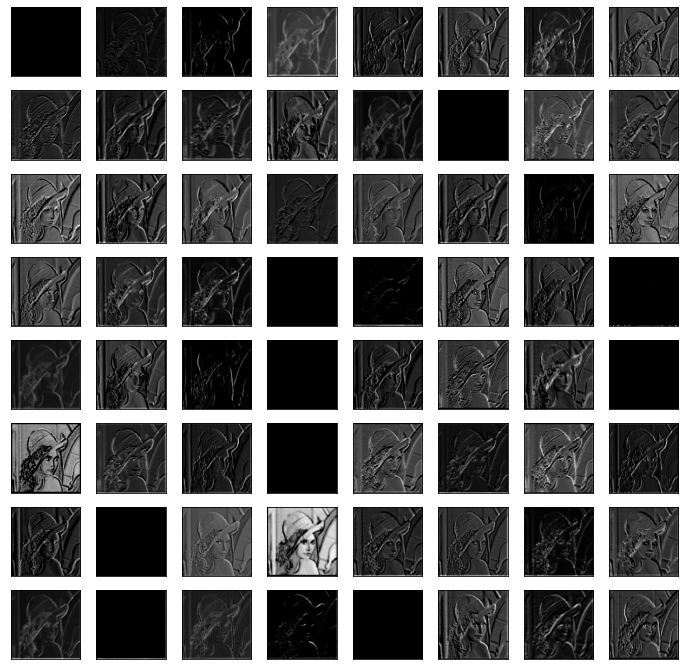

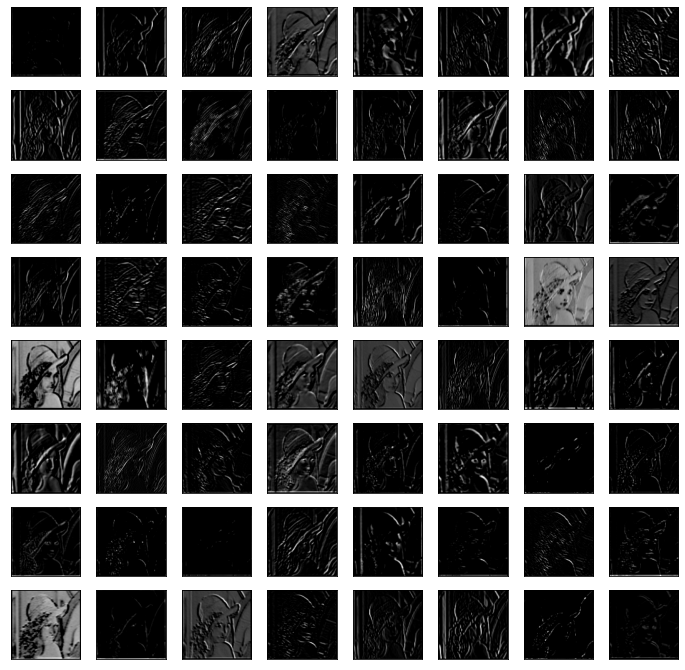

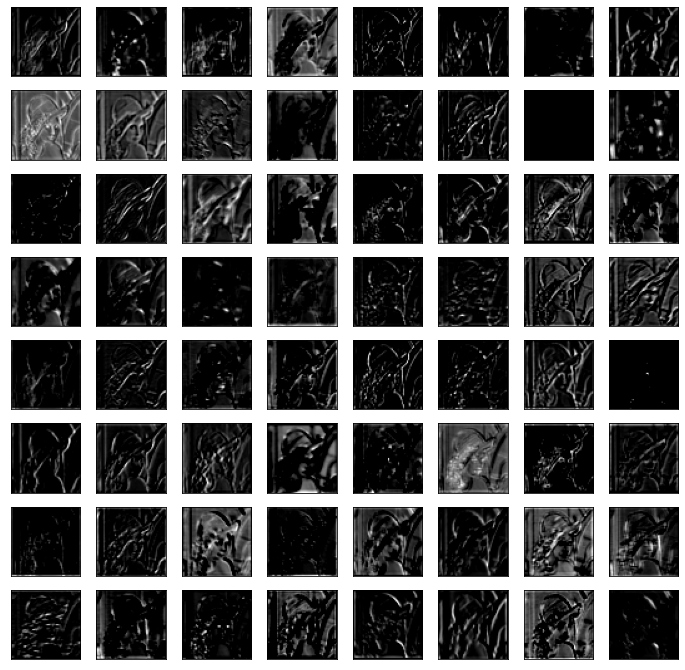

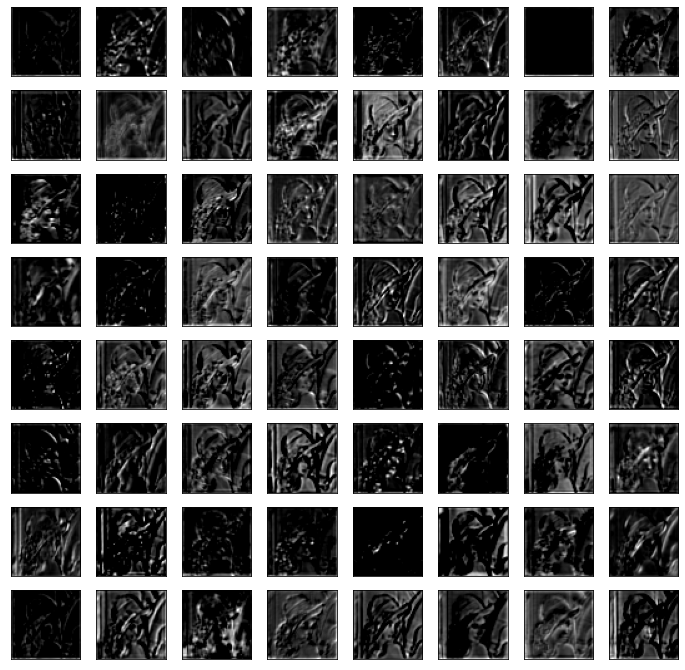

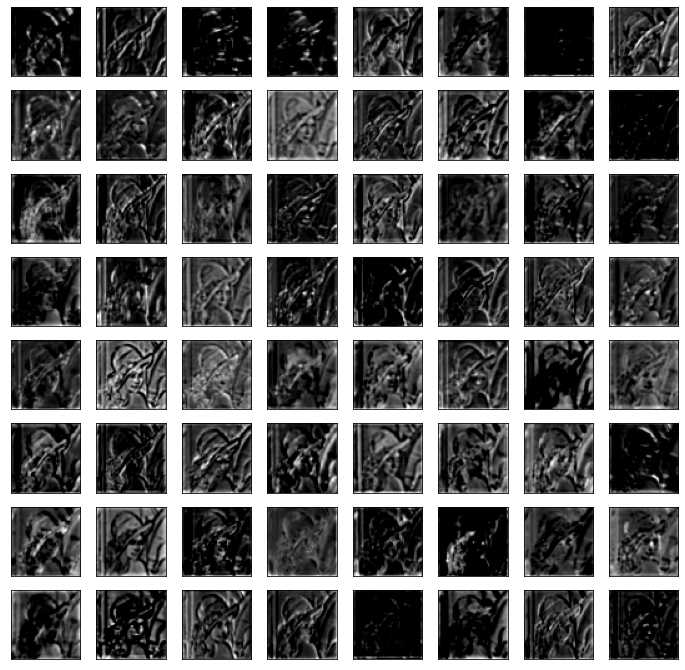

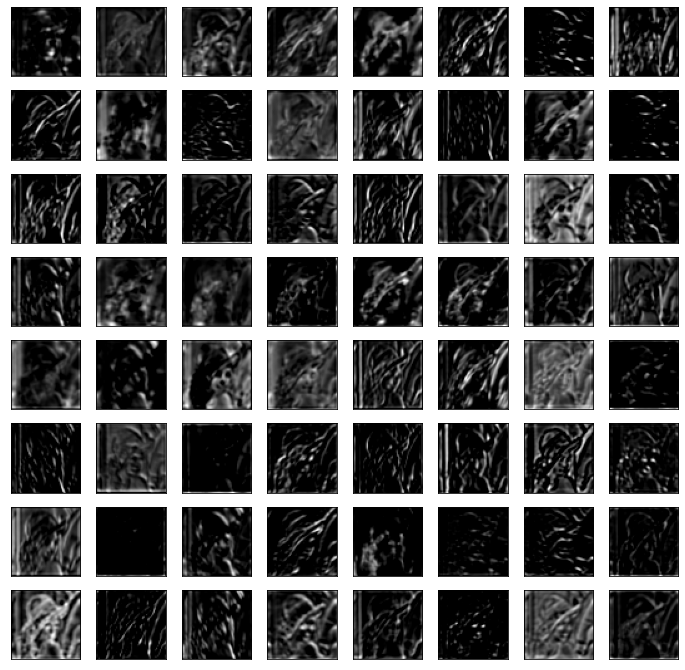

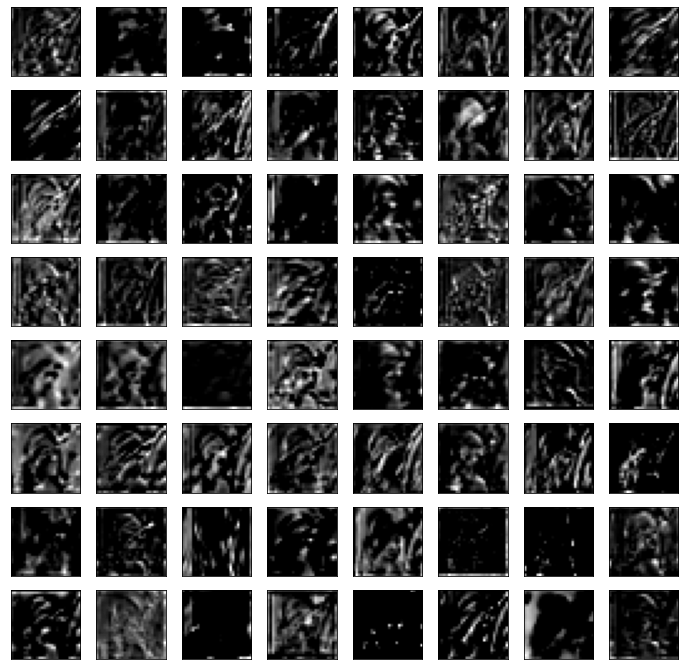

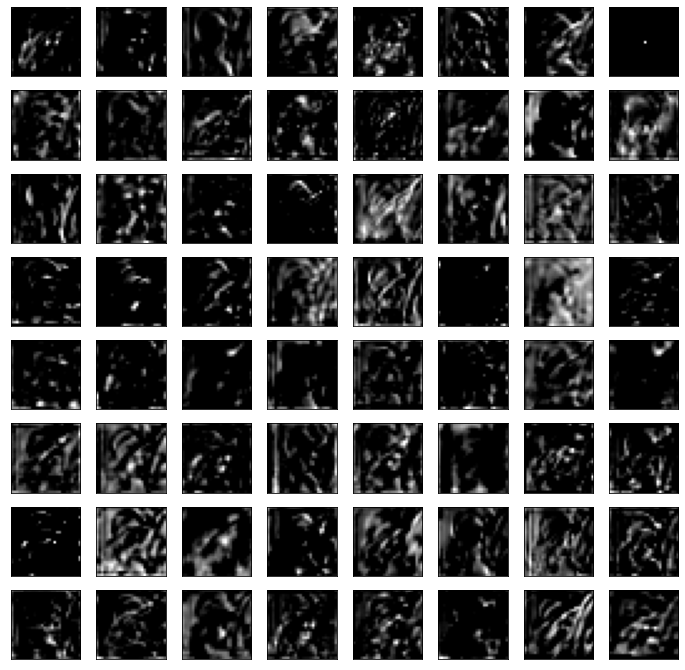

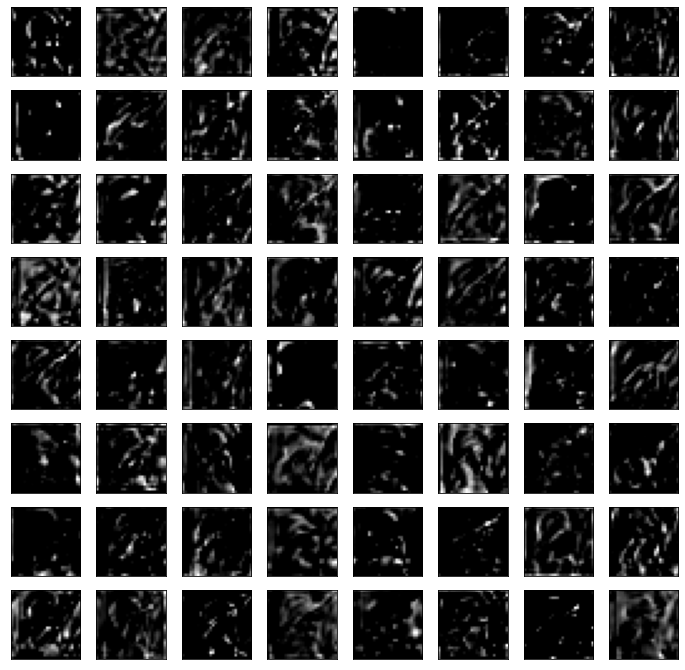

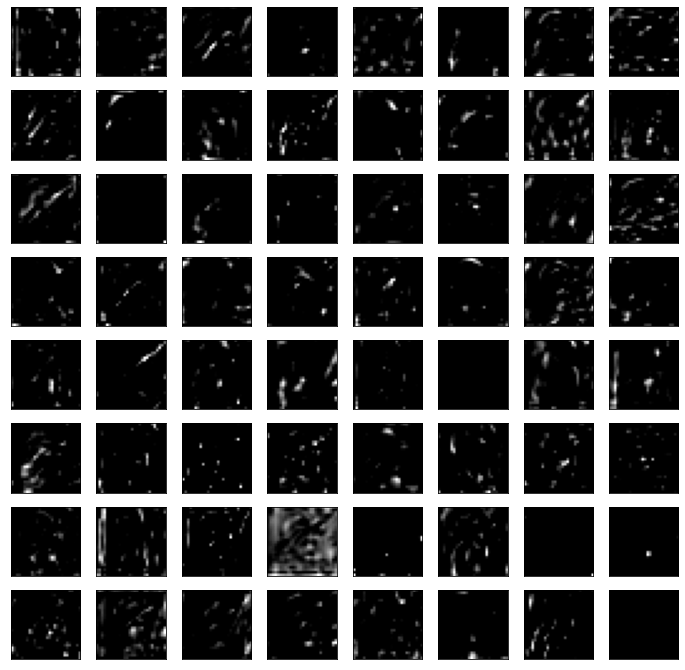

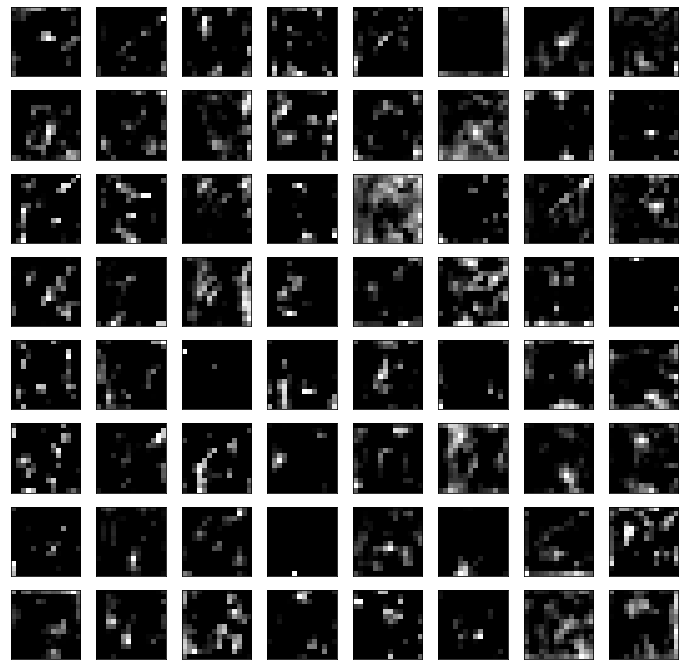

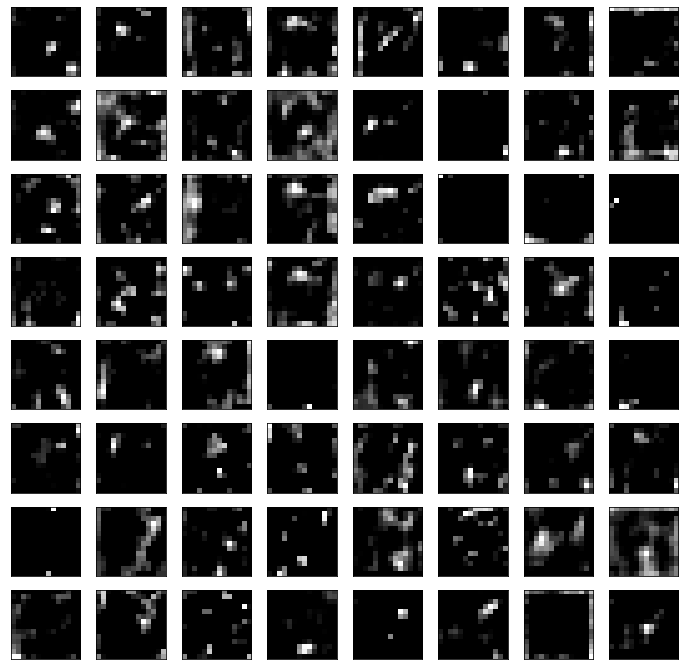

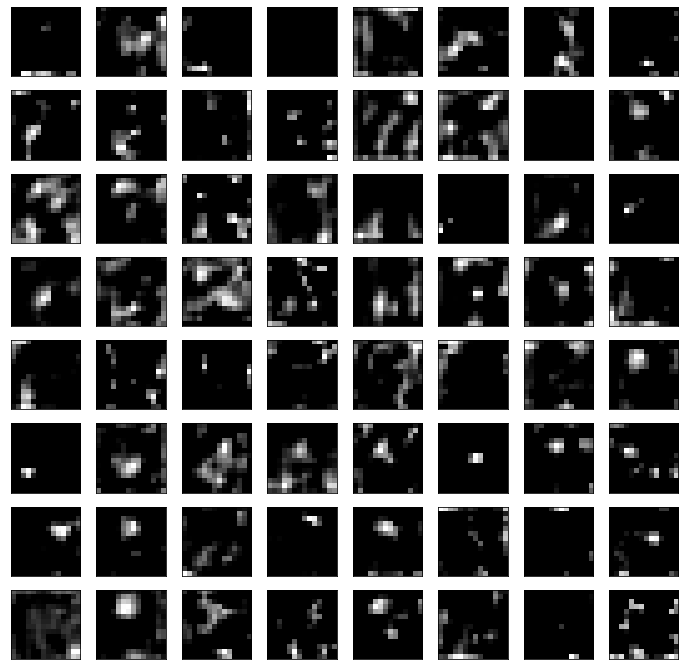

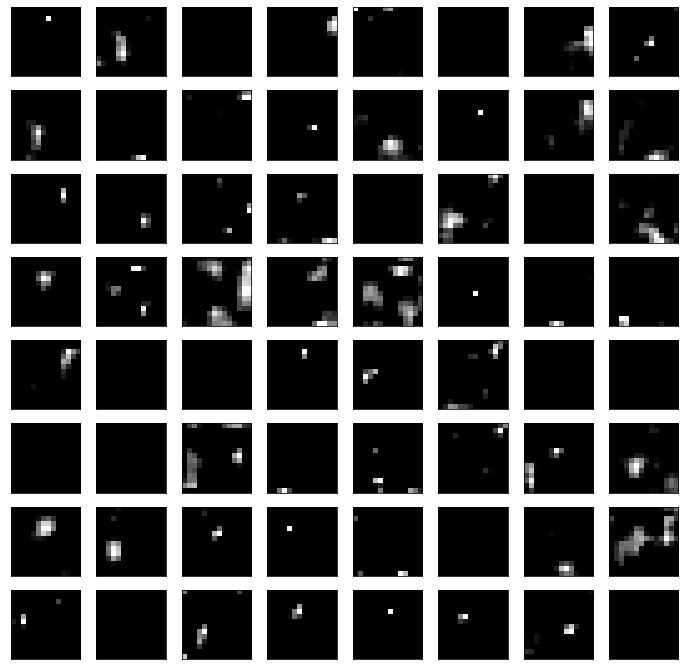

In [ ]:
#Input shape to the model is 224 x 224. SO resize input image to this shape.
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/photo_2022-04-10_22-23-06.jpg', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)
print(len(feature_output))

columns = 8
rows = 8
for ftr in feature_output:
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
    plt.show()

In [ ]:
import pandas as pd;
from tensorflow.keras.preprocessing.image import ImageDataGenerator;
test_gen = ImageDataGenerator(rescale=1./255);
test_df = pd.read_csv('/content/Test.csv')
test_df['ClassId']=test_df['ClassId'].astype(str)
test_gen=test_gen.flow_from_dataframe( test_df, x_col='Path', y_col='ClassId', target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=32)


Found 12630 validated image filenames belonging to 43 classes.
